# API ESIOS

## Import libraries

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

## Set headers for API REST request

In [4]:
token = os.environ['ESIOS_API_KEY']

headers = dict()
headers['Accept'] = 'application/json; application/vnd.esios-api-v1+json'
headers['Content-Type'] = 'application/json'
headers['Host'] = 'api.esios.ree.es'
headers['x-api-key'] = token
headers['Cookie'] = ''

### Request indicators list

In [5]:
url = 'https://api.esios.ree.es/indicators'
indicator_list = requests.get(url, headers = headers)
print(indicator_list.status_code)

200


In [25]:
"\u003cp\u003e" == "<p>"

True

In [10]:
table = pd.DataFrame(indicator_list.json()["indicators"]).set_index('id')
table

,name,description,short_name
id,,,
1,Generación programada PBF Hidráulica UGH,"<p>Es el programa de energía diario, con desgl...",Hidráulica UGH
2,Generación programada PBF Hidráulica no UGH,"<p>Es el programa de energía diario, con desgl...",Hidráulica no UGH
3,Generación programada PBF Turbinación bombeo,"<p>Es el programa de energía diario, con desgl...",Turbinación bombeo
4,Generación programada PBF Nuclear,"<p>Es el programa de energía diario, con desgl...",Nuclear
5,Generación programada PBF Hulla antracita Anex...,"<p>Es el programa de energía diario, con desgl...",Hulla antracita RD 134/2010
...,...,...,...
10408,RD-L 10/2022 restricciones tÃ©cnicas y mercado...,<p>RD-L 10/2022 restricciones tÃ©cnicas y merc...,Mercado diario e intradiario
10409,RD-L 10/2022 mercado diario e intradiario - Anual,<p>RD-L 10/2022 mercado diario e intradiario -...,Mercado diario e intradiario
10410,RD-L 10/2022 mercado diario e intradiario - di...,<p>RD-L 10/2022 mercado diario e intradiario -...,Mercado diario e intradiario


In [11]:
table.description[1]

'<p>Es el programa de energía diario, con desglose horario, de las diferentes Unidades de Programación correspondientes a ventas y adquisiciones de energía en el sistema eléctrico peninsular español. En concreto este indicador se refiere a las unidades de programación con tipo de producción hidráulica UGH.</p><p>Este programa es establecido por el OS a partir de la casación del OM y de las nominaciones de programas de todas y cada una de las Unidades de Programación que le han sido comunicadas por los sujetos titulares de dichas Unidades de Programación, incluyendo las correspondientes a la ejecución de contratos bilaterales con entrega física de los cuales se ha confirmado la ejecución.</p><p><b>Publicación:</b> diariamente a partir de las 13:45 horas con la información del día D+1.</p>'

In [12]:
table.description = (table.description
                     .str.replace('<p>','')
                     .str.replace('</p>','')
                     .str.replace('<b>', '')
                     .str.replace('</b>', ''))

In [13]:
table.description[1]

'Es el programa de energía diario, con desglose horario, de las diferentes Unidades de Programación correspondientes a ventas y adquisiciones de energía en el sistema eléctrico peninsular español. En concreto este indicador se refiere a las unidades de programación con tipo de producción hidráulica UGH.Este programa es establecido por el OS a partir de la casación del OM y de las nominaciones de programas de todas y cada una de las Unidades de Programación que le han sido comunicadas por los sujetos titulares de dichas Unidades de Programación, incluyendo las correspondientes a la ejecución de contratos bilaterales con entrega física de los cuales se ha confirmado la ejecución.Publicación: diariamente a partir de las 13:45 horas con la información del día D+1.'

In [14]:
table.to_excel('esios_indicators.xlsx',sheet_name='indicators')

In [15]:
params = {'start_date': '2023-07-23T00:00', 'end_date': '2023-08-22T23:00'}

200


<Axes: xlabel='datetime'>

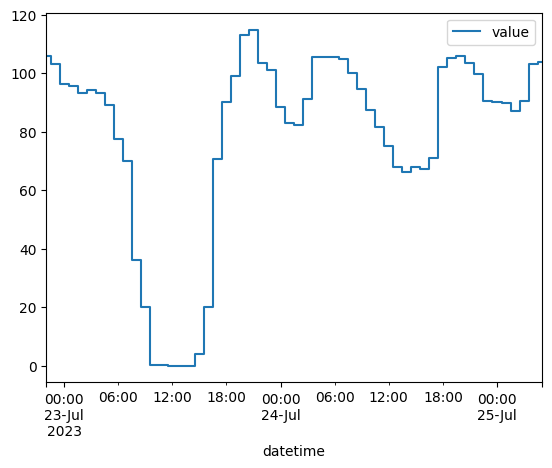

In [28]:
    # https://api.esios.ree.es/indicators/1373?start_date=' + '2023-04-10T00:00:00' + 'Z&end_date=' + '2023-04-10T23:00:00' + 'Z'
indicator = '600'
response = requests.get(f"https://api.esios.ree.es/indicators/{indicator}", headers=headers, params=params)
print(response.status_code)

df1 = pd.DataFrame(response.json()['indicator']['values'])[['datetime','geo_name','value']]
df1.datetime = pd.to_datetime(df1.datetime, utc = True)
# df1.set_index('datetime', inplace=True)
df1.query("geo_name == 'España'").iloc[:56].plot(y = 'value', x='datetime' ,drawstyle = 'steps-mid')

In [29]:
# df1.datetime = pd.to_datetime(df1.datetime, utc=True)
df1.datetime = df1.datetime.dt.tz_convert('Europe/Madrid')

In [30]:
df1.datetime

0      2023-07-23 00:00:00+02:00
1      2023-07-23 00:00:00+02:00
2      2023-07-23 00:00:00+02:00
3      2023-07-23 00:00:00+02:00
4      2023-07-23 00:00:00+02:00
                  ...           
5947   2023-08-22 23:00:00+02:00
5948   2023-08-22 23:00:00+02:00
5949   2023-08-22 23:00:00+02:00
5950   2023-08-22 23:00:00+02:00
5951   2023-08-22 23:00:00+02:00
Name: datetime, Length: 5952, dtype: datetime64[ns, Europe/Madrid]

In [31]:
data = df1.pivot(index = 'datetime', columns = 'geo_name').copy()

<Axes: xlabel='datetime'>

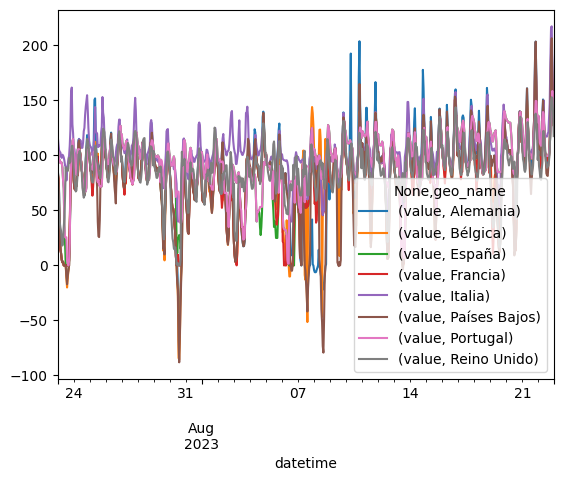

In [32]:
data.plot()

In [34]:
data.columns = data.columns.levels[1]

data.columns = data.columns.astype('category')

In [36]:
data.columns

CategoricalIndex(['Alemania', 'Bélgica', 'España', 'Francia', 'Italia',
                  'Países Bajos', 'Portugal', 'Reino Unido'],
                 categories=['Alemania', 'Bélgica', 'España', 'Francia', 'Italia', 'Países Bajos', 'Portugal', 'Reino Unido'], ordered=False, dtype='category', name='geo_name')

## Plot prices side by side

In [17]:
import pandas as pd
import dash
from dash import dcc
from dash import html
import plotly.express as px
from dash.dependencies import Input, Output
# from datetime import datetime, timedelta

In [21]:
# Create sample data (replace this with your actual data)
# data = {
#     "Date": [datetime.now() - timedelta(days=i) for i in range(7)],
#     "Spain": [10, 12, 15, 14, 13, 12, 11],
#     "Portugal": [8, 9, 10, 9.5, 8.5, 8, 7.5],
#     "France": [14, 15, 14.5, 16, 15.5, 14, 13.5]
# }
countries = df1.geo_name.unique()
# df = pd.DataFrame(data)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Electricity Price Visualization"),
    
    html.Div(
        [dcc.Graph(id=country) 
         for country in countries][:1],
        # [dcc.Graph(id='spain-graph'),
        # dcc.Graph(id='portugal-graph'),
        # dcc.Graph(id='france-graph')], 
        style={'display': 'flex'}),
    
    dcc.Interval(
        id='interval-component',
        interval=60 * 1000,  # Update every minute
        n_intervals=0
    )
])

@app.callback([Output(country, 'figure') 
               for country in countries][:1],
    # [Output('spain-graph', 'figure'),
    #  Output('portugal-graph', 'figure'),
    #  Output('france-graph', 'figure')],
    [Input('interval-component', 'n_intervals')]
)
def update_graphs(n_intervals):
    # recent_data = df.tail(7)  # Last 7 days
    figs = []
    for country in countries[:1]:
        fig.append(
            px.line(data, x=data.index, y=country, title=f'Electricity Price in {country}'))
        
    
    return figs[0]

if __name__ == '__main__':
    app.run_server(debug=True, port = 8097)

Dash is running on http://127.0.0.1:8097/

 * Serving Flask app '__main__'
 * Debug mode: on


Traceback (most recent call last):
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/site-packages/traitlets/config/application.py", line 1042, in launch_instance
    app.initialize(argv)
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/site-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 678, in initialize
    self.init_sockets()
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/site-pa

SystemExit: 1

In [102]:
%tb

SystemExit: 1

In [ ]:
app.server.aborter

In [22]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output
from datetime import datetime, timedelta

# Create sample data (replace this with your actual data)
data = {
    "Date": [datetime.now() - timedelta(days=i) for i in range(7)],
    "Spain": [10, 12, 15, 14, 13, 12, 11],
    "Portugal": [8, 9, 10, 9.5, 8.5, 8, 7.5],
    "France": [14, 15, 14.5, 16, 15.5, 14, 13.5]
}
df = pd.DataFrame(data)

app = dash.Dash(__name__)

# Create a list of country column names (excluding 'Date')
country_columns = [col for col in df.columns if col != 'Date']

app.layout = html.Div([
    html.H1("Electricity Price Visualization"),
    
    # Dynamic generation of graph components
    html.Div([
        dcc.Graph(id=f'{country}-graph', config={'displayModeBar': False}) for country in country_columns
    ], style={'display': 'flex'}),
    
    dcc.Interval(
        id='interval-component',
        interval=60 * 1000,  # Update every minute
        n_intervals=0
    )
])

@app.callback(
    [Output(f'{country}-graph', 'figure') for country in country_columns],
    [Input('interval-component', 'n_intervals')]
)
def update_graphs(n_intervals):
    recent_data = df.tail(7)  # Last 7 days
    
    # Dynamic generation of figure for each country
    figs = []
    for country in country_columns:
        fig = px.line(recent_data, x='Date', y=country, title=f'Electricity Price in {country}')
        figs.append(fig)
    
    return figs

if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


/tmp/ipykernel_7899/1282488952.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_7899/1282488952.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
Traceback (most recent call last):
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/gelattoo/miniconda3/envs/py310/lib/python3.10/site-packages/traitlets/config/application.py", l

SystemExit: 1

/home/gelattoo/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [47]:
df3 = df1.join(df2, lsuffix='_bajar', rsuffix = '_subir')

In [48]:
df3.value_bajar = - df3.value_bajar

In [50]:
df3.corr()

,value_bajar,value_subir
value_bajar,1.000000,-0.515255
value_subir,-0.515255,1.000000


<Axes: xlabel='datetime'>

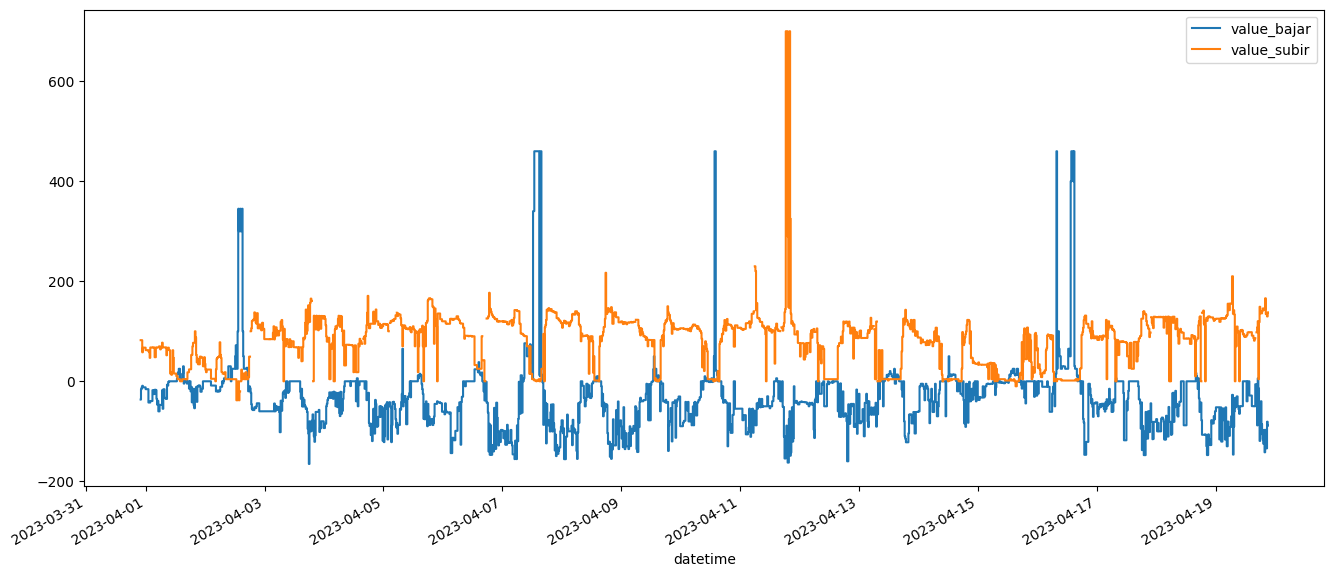

In [49]:
df3.plot(drawstyle = 'steps-mid', figsize = (16, 7))

In [42]:
df3.loc[df3.valuesubir_.isna()]

,value,valuesubir_
datetime,,
2023-04-01 16:30:00+00:00,25.75,NaN
2023-04-02 07:00:00+00:00,29.81,NaN
2023-04-02 07:30:00+00:00,29.81,NaN
2023-04-02 14:15:00+00:00,20.54,NaN
2023-04-02 18:15:00+00:00,5.00,NaN
2023-04-03 19:15:00+00:00,4.33,NaN
2023-04-03 19:30:00+00:00,4.33,NaN
2023-04-04 15:30:00+00:00,22.88,NaN
2023-04-04 15:45:00+00:00,22.88,NaN


In [18]:
response.json()

{'indicator': {'name': 'Precio Banda de regulación secundaria',
  'short_name': 'Banda secundaria',
  'id': 634,
  'composited': False,
  'step_type': 'linear',
  'disaggregated': False,
  'magnitud': [{'name': 'Precio', 'id': 23}],
  'tiempo': [{'name': 'Quince minutos', 'id': 218}],
  'geos': [{'geo_id': 8741, 'geo_name': 'Península'}],
  'values_updated_at': '2023-04-18T16:31:11.000+02:00',
  'values': [{'value': 7.03,
    'datetime': '2023-04-01T00:00:00.000+02:00',
    'datetime_utc': '2023-03-31T22:00:00Z',
    'tz_time': '2023-03-31T22:00:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 7.03,
    'datetime': '2023-04-01T00:15:00.000+02:00',
    'datetime_utc': '2023-03-31T22:15:00Z',
    'tz_time': '2023-03-31T22:15:00.000Z',
    'geo_id': 8741,
    'geo_name': 'Península'},
   {'value': 7.03,
    'datetime': '2023-04-01T00:30:00.000+02:00',
    'datetime_utc': '2023-03-31T22:30:00Z',
    'tz_time': '2023-03-31T22:30:00.000Z',
    'geo_id': 8741,
    'geo

## GET request

### Request for list of existing indicators in the API

In [25]:
bit = 'indicators'
# bit = 'auctions'

In [26]:
r = requests.get(f'https://api.esios.ree.es/{bit}' , headers=headers) # This url returns an indexed table with all indicators provided through the API
r.status_code

200

In [ ]:
indice = pd.DataFrame((r.json()["indicators"]))

In [ ]:
indice.to_excel("indice_datos_ESIOS.xlsx", index=False)

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/1373?start_date=' + '2023-04-10T00:00:00' + 'Z&end_date=' + '2023-04-10T23:00:00' + 'Z', headers=headers)

In [ ]:
l.status_code

In [ ]:
indicator = '1929'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
ll = requests.get('https://api.esios.ree.es/indicators/683?start_date=' + '2023-01-01T00:00:00' + 'Z&end_date=' + '2023-03-30T00:00:00' + 'Z', headers=headers)

In [ ]:
df = pd.DataFrame(l.json()['indicator']["values"])

In [ ]:
df.rename(columns={'value':'Fase_I_subir'}, inplace=True)
df.columns

In [ ]:
pd.to_datetime(df.datetime)

In [ ]:
df.datetime = pd.to_datetime(df.datetime, utc = True)

In [ ]:
df = (df[["datetime","geo_name","value"]])
df.datetime = pd.to_datetime(df.datetime, utc = True)

In [ ]:
df.set_index("datetime", inplace = True)

In [ ]:
sns.lineplot(data = df, )

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df["Month"] = df.datetime.dt.month
df["Day"] = df.datetime.dt.day

In [ ]:
df.query('geo_name == "España"').groupby(["Month","Day"], as_index=False).agg({"value":["max","min"]})

In [ ]:
df2 = pd.DataFrame(ll.json()['indicator']["values"])[["datetime","value"]]

In [ ]:
df2.datetime = pd.to_datetime(df2.datetime, utc = True)
df.datetime = pd.to_datetime(df.datetime, utc = True)

In [ ]:
df

In [ ]:
df2

In [ ]:
df = df.set_index("datetime")
df2 = df2.set_index("datetime")

In [ ]:
df = df.rename(columns = {"value":"EUR_MWh_SUBIR"})
df2 = df2.rename(columns = {"EUR_MWh_SUBIR":"EUR_MWh_BAJAR"})

In [ ]:
df3 = df.join(df2)

In [ ]:
df3.plot()

In [ ]:
df3.to_csv("precios_secundaria_2023.csv")

In [ ]:
df = df.rename(columns = {"value":"EUR_MWh_SUBIR"})

In [ ]:
df2.rename(columns={"value":"EUR_MWh_BAJAR"}, inplace=True)

In [ ]:
df.index

In [ ]:
df2.index 

In [ ]:
df.join(df2)

In [ ]:
d = []
for r in drse.iterrows():
  l = requests.get('https://api.esios.ree.es/indicators/682?start_date=' + r[1]["start"] + 'Z&end_date=' + r[1]["end"] + 'Z', headers=headers)
  for t in l.json()['indicator']['values']:
    d.append(t)

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df.plot(x = 'datetime', y = 'value', figsize = (25,7))

In [ ]:
df.to_parquet('demand_esp.parquet', index = False)

In [ ]:
df.columns

In [ ]:
df.datetime = pd.to_datetime(df.datetime)

In [ ]:
df.rename(columns={"geo_name":"unique_id",
                   "datetime":"ds",
                   "value":"y"}, inplace = True)

In [ ]:
df.drop(columns=['datetime_utc', 'tz_time', 'geo_id'], inplace=True)
df.head()

In [ ]:
df = df[["unique_id","ds","y"]]

In [ ]:
!pip install statsforecast
!pip install datasetsforecast
!pip install prophet
!pip install "neuralprophet[live]"

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA, SeasonalNaive
from statsforecast.utils import AirPassengers as ap

## Definición función API

In [7]:
def esios_api(indicator:int, token:str, headers:dict, params:dict):
    response = requests.get('https://api.esios.ree.es/indicators/' + str(indicator), headers=headers, params=params)
    print(response.url)
    if response.status_code != 200:
        raise ValueError(f'Request failed with status code {response.status_code}: {response.text}')
    print(response.status_code)
    
    return response.json()

In [21]:
df = pd.DataFrame(esios_api(600, token, '2023-04-01T00:00', '2023-04-19T00:00', headers=headers)['indicator']['values'])
df.datetime = pd.to_datetime(df.datetime, utc = True)

https://api.esios.ree.es/indicators/600?start_date=2023-04-01T00%3A00&end_date=2023-04-19T23%3A00
200


In [ ]:
%matplotlib inline

<AxesSubplot:xlabel='datetime'>

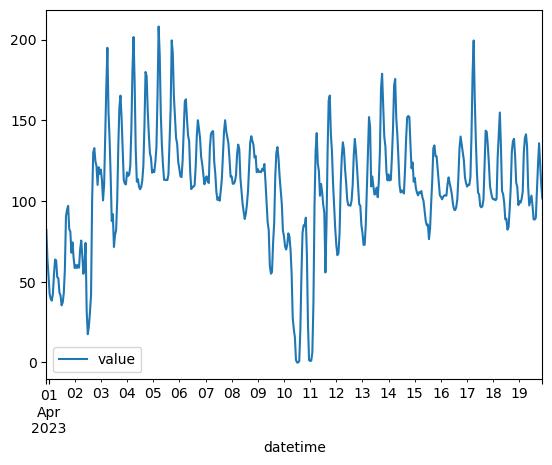

In [23]:
df.query("geo_name == 'Francia'").plot(x = 'datetime', y = 'value')

## Dash

In [ ]:
df.dtypes

### no choice

In [ ]:
import dash
from dash import dcc
from dash import html
# import pandas as pd
import plotly.graph_objs as go

# Load the dataframe
# df = pd.read_csv('your_dataframe.csv')

# Define the app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("2D Plot Dashboard"),
    html.Div([
        dcc.Dropdown(
            id='x-axis',
            options=[{'label': col, 'value': col} for col in df.columns],
            value=df.columns[0]
        )
    ],
    style={'width': '48%', 'display': 'inline-block'}),
    html.Div([
        dcc.Dropdown(
            id='y-axis',
            options=[{'label': col, 'value': col} for col in df.columns],
            value=df.columns[1]
        )
    ],
    style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
    dcc.Graph(id='scatter-plot')
])

# Define the callbacks
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('x-axis', 'value'),
     dash.dependencies.Input('y-axis', 'value')])
def update_scatter_plot(xaxis_column_name, yaxis_column_name):
    return {'data': [go.Scatter(
                        x=df[xaxis_column_name],
                        y=df[yaxis_column_name],
                        mode='lines'
                    )],
            'layout': go.Layout(
                xaxis={'title': xaxis_column_name},
                yaxis={'title': yaxis_column_name},
                hovermode='closest'
            )}

# Run the app
if __name__ == '__main__':
    app.run_server(port=8051)


### One choice

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go

# Load data
# df = pd.read_csv('data.csv')

# Define app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Spot Prices in Europe"),
    html.Label('X-axis'),
    dcc.Dropdown(
        id='x-axis',
        options=[{'label': col, 'value': col} for col in df.columns],
        value=df.columns[0]
    ),
    html.Label('Y-axis'),
    dcc.Dropdown(
        id='y-axis',
        options=[{'label': col, 'value': col} for col in df.columns],
        value=df.columns[1]
    ),
    html.Label('Country'),
    dcc.Dropdown(
        id='category',
        options=[{'label': cat, 'value': cat} for cat in df['geo_name'].unique()],
        value=df['geo_name'].unique()[0]
    ),
    dcc.Graph(id='scatter-plot')
])

# Define callback
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('x-axis', 'value'),
     dash.dependencies.Input('y-axis', 'value'),
     dash.dependencies.Input('category', 'value')])
def update_plot(x_col, y_col, category):
    filtered_df = df[df['geo_name'] == category]  # Filter the DataFrame by category
    trace = go.Scatter(
        x=filtered_df[x_col],
        y=filtered_df[y_col],
        mode='lines'
    )
    layout = go.Layout(
        xaxis={'title': x_col},
        yaxis={'title': y_col},
        margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
        hovermode='closest'
    )
    return {'data': [trace], 'layout': layout}

# Run app
if __name__ == '__main__':
    app.run_server(port = 8051)

### multiple choice with steps

In [6]:
df.drop(columns=['datetime_utc', 'tz_time', 'geo_id'], inplace=True)
df.head()

,value,datetime,geo_name
0,82.19,2023-03-31 22:00:00+00:00,Portugal
1,82.19,2023-03-31 22:00:00+00:00,Francia
2,82.19,2023-03-31 22:00:00+00:00,España
3,97.50,2023-03-31 22:00:00+00:00,Reino Unido
4,130.48,2023-03-31 22:00:00+00:00,Italia


In [7]:
df = df.astype({'geo_name':'category'})
df = df[['datetime','geo_name','value']]

In [37]:
import plotly
import plotly.express as px

In [38]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.graph_objs as go

# Load data
# df = pd.read_csv('data.csv')

# Define app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Spot prices in Europe"),
    html.H5("Pick X-axis data"),
    # html.Label('X-axis'),
    dcc.Dropdown(
        id='x-axis',
        options=[{'label': col, 'value': col} for col in df.columns],
        value=df.columns[0]
    ),
    html.H5("Pick Y-axis data"),
    # html.Label('Y-axis'),
    dcc.Dropdown(
        id='y-axis',
        options=[{'label': col, 'value': col} for col in df.columns],
        value=df.columns[2]
    ),
    html.Label('Categories'),
    dcc.Dropdown(
        id='categories',
        options=[{'label': cat, 'value': cat} for cat in df['geo_name'].unique()],
        value=df['geo_name'].unique(),
        multi=True
    ),
    dcc.Graph(id='scatter-plot')
])

# Define callback
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('x-axis', 'value'),
     dash.dependencies.Input('y-axis', 'value'),
     dash.dependencies.Input('categories', 'value')])
def update_plot(x_col, y_col, categories):
    traces = []
    for cat in categories:
        filtered_df = df[df['geo_name'] == cat]  # Filter the DataFrame by category
        trace = go.Scatter(
            x=filtered_df[x_col],
            y=filtered_df[y_col],
            mode='lines',
            line=dict(shape='hv', width=2),  # Set the line shape to horizontal-vertical step
            name=cat  # Set the name of the trace to the category name
        )
        traces.append(trace)
    layout = go.Layout(
        xaxis={'title': x_col},
        yaxis={'title': y_col},
        margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
        hovermode='closest'
    )
    return {'data': traces, 'layout': layout}

# Run app
if __name__ == '__main__':
    app.run()

NameError: name 'df' is not defined

### Dashboard and API call

<span style="color:red">IT IS STILL UNDER CONSTRUCTION. I JUST COPIED AND PASTED FROM chatGPT.</span>

In [41]:
%%writefile app.py 

import requests
import datetime
import pandas as pd
import dash
from dash import dcc, html
import plotly.graph_objs as go

app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1(children='API Data Dashboard'),
    html.Div(children='''
        Select start and end timestamps:
    '''),
    dcc.Input(id='start-timestamp', type='text', value='2023-04-01T00:00:00'),
    dcc.Input(id='end-timestamp', type='text', value='2023-04-19T00:00:00'),
    html.Div(children='''
        Enter API token:
    '''),
    dcc.Input(id='api-token', type='text', value=''),
    html.Button('Submit', id='submit-button'),
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [dash.dependencies.Input('submit-button', 'n_clicks')],
    [dash.dependencies.State('start-timestamp', 'value'),
     dash.dependencies.State('end-timestamp', 'value'),
     dash.dependencies.State('api-token', 'value')])
def update_plot(n_clicks, start_timestamp, end_timestamp, api_token):
    # Parse the start and end timestamps using the datetime module
    start_dt = datetime.datetime.fromisoformat(start_timestamp)
    end_dt = datetime.datetime.fromisoformat(end_timestamp)
    
    # Make the API request using the requests library
    headers = dict()
    headers['Accept'] = 'application/json; application/vnd.esios-api-v1+json'
    headers['Content-Type'] = 'application/json'
    headers['Host'] = 'api.esios.ree.es'
    headers['x-api-key'] = api_token
    headers['Cookie'] = ''
    
    # print(api_token)
    
    params = {'start_date': start_dt.isoformat(), 'end_date': end_dt.isoformat()}
    # https://api.esios.ree.es/indicators/1373?start_date=' + '2023-04-10T00:00:00' + 'Z&end_date=' + '2023-04-10T23:00:00' + 'Z'
    response = requests.get('https://api.esios.ree.es/indicators/600', headers=headers, params=params)
    print(response.status_code)
    print(response.url)
    print(response.json()['indicator']['values'])
    if response.status_code != 200:
        raise ValueError(f'Request failed with status code {response.status_code}: {response.text}')
    data = response.json()['indicator']['values']
    
    # Convert the API response to a Pandas DataFrame
    df = pd.DataFrame(data)
    df.datetime = pd.to_datetime(df.datetime, utc = True)
    # Create the plot
    traces = []
    for category in df['geo_name'].unique():
        filtered_df = df.loc[df['geo_name'] == category]
        trace = go.Scatter(
            x=pd.to_datetime(filtered_df['datetime'], utc = True),
            y=filtered_df['value'],
            mode='lines',
            name=category
        )
        traces.append(trace)
    layout = go.Layout(
        xaxis={'title': 'Timestamp'},
        yaxis={'title': 'Value'},
        margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
        hovermode='closest'
    )
    return {'data': traces, 'layout': layout}

if __name__ == '__main__':
    app.run(debug=False)

Overwriting app.py


In [40]:
dash.__version__

'2.9.3'

In [ ]:
import plotly

In [ ]:
plotly.__version__

In [ ]:
import dash

## Respuesta activa de la demanda

### Indicadores relevantes

nombre|ID
:-------:|:-----:
Potencia activada en el servicio de respuesta activa de la demanda|1929
Precio marginal en el servicio de respuesta activa de la demanda|1930
Energía asignada en el servicio de respuesta activa de la demanda|1931
Derechos de cobro de la activación del servicio de respuesta activa de la demanda|1932
Precio medio ponderado de activación del servicio de respuesta activa de la demanda|10412

### Potencia activada

In [ ]:
indicator = '1929'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

### Precio marginal

In [ ]:
indicator = '1930'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

### Energía asignada

In [ ]:
indicator = '1931'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

### Derechos de cobro de la activación del servicio de respuesta activa de la demanda

In [ ]:
indicator = '1932'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

### Precio medio ponderado de activación del servicio de respuesta activa de la demanda

In [ ]:
indicator = '10412'

In [ ]:
l = requests.get('https://api.esios.ree.es/indicators/' + indicator + '?start_date=' + '2022-10-01T00:00:00' + 'Z&end_date=' + '2023-04-17T23:00:00' + 'Z', headers=headers)
l.status_code

In [ ]:
l.json()

## Reserva Terciaria